<a href="https://colab.research.google.com/github/Somu-Gen/WQI_Streamlit/blob/main/WQI_%26_Prediction_Ap_j21calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import plotly.express as px

In [ ]:
df=pd.read_csv("/content/Jan_wqi_2018.csv",index_col=0)

In [ ]:
df.columns

Index(['S.No.', 'Station_name', 'District/RO', 'Monitoring_date', 'pH', 'TA',
       'Cl', 'Ca', 'Mg', 'Sulphate', 'Na', 'TDS', 'K', 'F', 'wqi', 'quality'],
      dtype='object')

In [ ]:
df=df.drop(["S.No."],axis=1)
df.head()

,Station_name,District/RO,Monitoring_date,pH,TA,Cl,Ca,Mg,Sulphate,Na,TDS,K,F,wqi,quality
0,Upstream of river Krishna at\nPrakasam barrage,Krishna /\nVijayawada,05.01.2018,7.45,120.0,210.0,36.0,12.0,35.0,120.0,520.0,4.0,0.68,61.090928,Poor
1,Upstream of Pennar river at\nSomasila,Nellore /\nNellore,08.01.2018,7.68,150.0,210.0,40.0,19.0,40.0,110.0,580.0,3.0,0.78,70.293242,Poor
2,Puligadda aqueduct near\nAvanigadda (V),Krishna /\nVijayawada,23.01.2018,7.57,260.0,8400.0,1520.0,768.0,1650.0,3600.0,20400.0,400.0,1.15,389.759418,Not suitable
3,River Krishna at Amaravathi,Krishna /\nVijayawada,08.01.2018,7.71,210.0,140.0,56.0,19.0,55.0,80.0,520.0,3.0,0.68,62.705617,Poor
4,Downstream of Krishna river at\nVedadri,Krishna /\nVijayawada,08.01.2018,7.62,160.0,260.0,48.0,21.0,65.0,140.0,710.0,3.0,0.71,64.731343,Poor


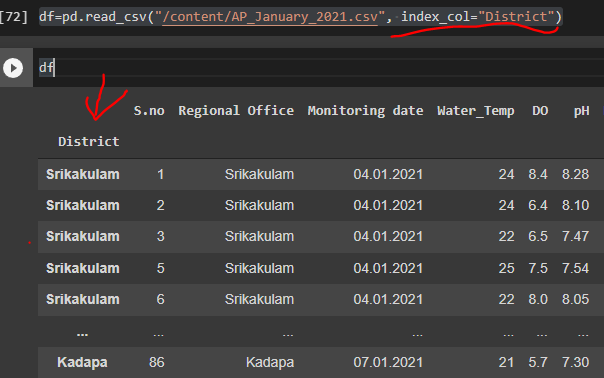

In [ ]:
df.shape

(35, 16)

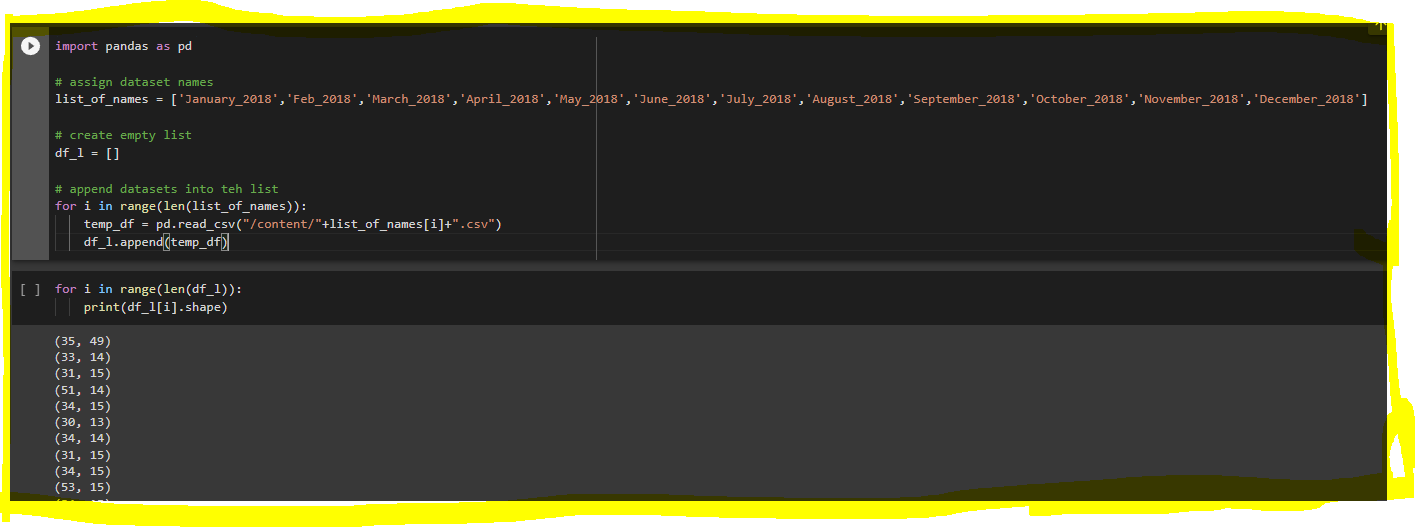

In [ ]:
df.describe()

,S.No.,pH,TA,Cl,Ca,Mg,Sulphate,Na,TDS,K,F,wqi
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,18.000000,7.591818,239.612903,500.580645,202.838710,111.774194,148.129032,261.516129,1439.757576,21.193548,0.641613,75.311616
std,10.246951,0.277515,139.000990,1421.166149,262.065898,132.056964,291.827481,617.726375,3435.234884,67.028712,0.224278,58.664145
min,1.000000,6.920000,110.000000,24.000000,36.000000,12.000000,8.000000,12.000000,216.000000,2.000000,0.230000,25.689647
25%,9.500000,7.425000,140.000000,71.000000,94.000000,45.500000,35.000000,53.500000,333.000000,2.500000,0.490000,51.219168
50%,18.000000,7.591818,210.000000,181.000000,120.000000,72.000000,65.000000,110.000000,690.000000,4.000000,0.641613,68.854302
75%,26.500000,7.735000,270.000000,342.000000,202.838710,132.000000,142.500000,248.758065,975.500000,19.000000,0.760000,76.252580
max,35.000000,8.100000,820.000000,8400.000000,1520.000000,768.000000,1650.000000,3600.000000,20400.000000,400.000000,1.200000,389.759418


In [ ]:
#df.groupby(['Regional Office']).count()['DO'].to_frame()

In [ ]:
#df.groupby(['Regional Office']).count()['DO'].plot(kind= 'pie')

In [ ]:
#df.groupby(['Regional Office']).count()['DO'].plot(kind='bar')

**I-Sub-index Calculation**

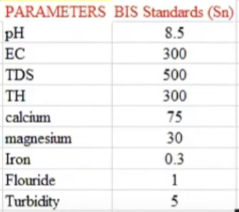

In [ ]:
def wqi(vn,vi,s):
  qn=((vn-vi)/(s-vi))*100
  return qn
  
qph=wqi(df.pH,7,8.5)
df['qpH']=qph

In [ ]:
df.pH

In [ ]:
#df.drop(['Monitoring_date','Water_Temp_(oC)'])

Sn = [ph_8.5, DO_5,Turbidity_5,TA_200,TDS_500,Mg_30,F_1]

In [ ]:
def wqi(vn,vi,s):
  qn=((vn-vi)/(s-vi))*100
  return qn

qph=wqi(df.pH,7,8.5)
df['qpH']=qph

q_DO=wqi(df.DO,14.6,5)
df['q_DO']=q_DO



q_Turbidity=wqi(df.Turbidity ,0,5)
df['q_Turbidity']=q_Turbidity

q_TA=wqi(df.TA,0,200)
df['q_TA']=q_TA

q_TDS=wqi(df.TDS,0,500)
df['q_TDS']=q_TDS

q_Mg=wqi(df.Magnesium,0,30)
df['q_Mg']=q_Mg

q_F=wqi(df.Fluoride,0,1)
df['q_F']=q_F


In [ ]:
df

In [ ]:
z = df.iloc[:,16:]
z


In [ ]:
c = z.sum(axis=1)
c

In [ ]:
z['final index']= c
z.to_csv("WQI_Ap_jan_2021.csv")

**2- Weightage Factor(w)**

Simple way to calculate is
**w = harmonic mean / total no.of samples**

wn= k/sn

k =1/Σ(1/sn)


In [ ]:
#Example
d = [1,2]

hm=statistics.harmonic_mean(d)/2
hm

**List to data frames Examples:**

---



https://www.statology.org/list-to-dataframe-python/


**Sn = [ph_8.5, DO_5,Turbidity_5,TA_200,TDS_500,Mg_30,F_1]**


In [ ]:
Sn = [8.5,5,5,200,500,30,1]

k=statistics.harmonic_mean(Sn)/len(Sn)
k

Wn=[]
for i in range(0,len(Sn)):
  w =k/Sn[i]
  Wn.append(w)
Wn  

Wn_c= pd.DataFrame(Wn,columns=["Wn"])
Wn_c

In [ ]:
k
L=len(Sn)
L

In [ ]:
Wn_c.shape

In [ ]:
df

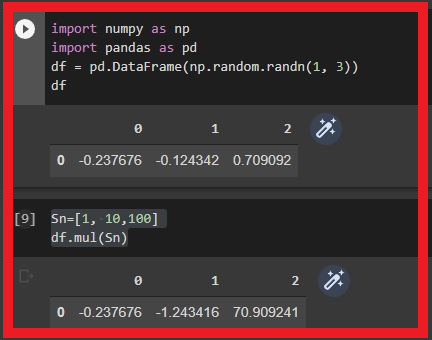

In [ ]:
z = df.iloc[:,16:]
z

In [ ]:
y= z.mul(Wn)
y

In [ ]:
s = y.sum(axis =1)
s

In [ ]:
y['WQI']= s
y.to_csv("F_WQI_Ap_jan_2021.csv")

In [ ]:
y

In [ ]:
df['wqi']=s
df.to_csv("F1_WQI_Ap_jan_2021.csv")

In [ ]:
df.groupby(['Regional Office']).count()['wqi'].plot(kind= 'pie')


In [ ]:
df


**Deleting the sub-index & weighting after using for calculation**

In [ ]:
li=['qpH','q_DO','q_Turbidity','q_TA','q_TDS','q_Mg','q_F']
for i in range(0,len(li)):
  del df[li[i]]

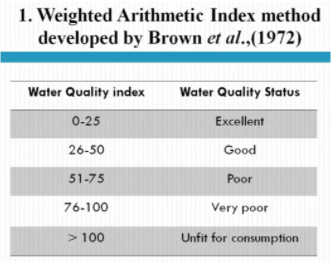

In [ ]:
df

**Violin Plots**

In [ ]:
# plotting the violin chart
fig = px.violin(df, x="District", y="wqi")
 
# showing the plot
fig.show()

**3D LINE Plots**

In [ ]:
# plotting the figure
fig = px.line_3d(df, x="District", y="wqi",z="Monitoring date", color="wqi")
 
fig.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fi=plt.figure()
ax1=fi.add_subplot(111, projection='3d')
xpos=df.Districts
ypos=df.wqi
zpos=df.

In [ ]:
clas=df.wqi
clas

In [ ]:
 wqi_list=[]
 for x in df['wqi']:
  if x<=25:
   wqi_list.append('Excellent')
  elif 25<x<=50:
    wqi_list.append('Good')
  elif 50<x<=75:
    wqi_list.append('Poor')
  elif 75<x<=100:
    wqi_list.append('Very poor')
  elif x>100:
    wqi_list.append('Not suitable')  

In [ ]:
#wqi_list

In [ ]:
df["quality"]=wqi_list

In [ ]:
df.head()

In [ ]:
df.groupby(['quality']).count()['wqi'].plot(kind= 'bar')

Plotly Bar Charts

https://plotly.com/python/bar-charts/


In [ ]:
fig = px.bar(df, x='District', y='wqi')
fig.yticks([])
fig.show()

Hiding Axes values 

In [ ]:
fig = px.bar(x= df.District ,y =df.wqi)
# Set the visibility ON
fig.update_xaxes(title='Districts', visible=True, showticklabels=True)
# Set the visibility OFF
fig.update_yaxes(title='WQI', visible=True, showticklabels=False)
fig.show()

In [ ]:
df.groupby(['quality']).count()['wqi'].plot(kind= 'pie')

In [ ]:
df.groupby(['quality']).count()['wqi'].plot(kind= 'line')

In [ ]:
x=df.quality
y=df.wqi
plt.xlabel('Quality')

In [ ]:

# Creating dataset
#cars-quality 
 
#data-wqi

 
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown","grey", "indigo")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(df.wqi,autopct = lambda pct: func(pct, df.wqi),explode = explode,labels = df.quality,shadow = True,colors = colors,startangle = 90,wedgeprops = wp,textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, df.quality,title ="Quality",loc ="center left",bbox_to_anchor =(1, 0, 0.5,1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")
 
# show plot
plt.show()

In [ ]:
df.to_csv("F2_WQI_Ap_jan_2021.csv")

In [ ]:
df2=df.drop(['District', 'Regional Office','Monitoring date','quality','S.no'], axis=1)

In [ ]:
df2.head()

#It begins

In [ ]:
df2=pd.read_csv("/content/Jan_wqi_2018.csvE",index_col=[0])

FileNotFoundError: ignored

In [ ]:
zxzaxdf2.corr()

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(df.drop(["S.no"],axis=1).corr(),annot=True,cmap='terrain')
plt.show()

In [ ]:
df2.head(2)

In [ ]:
df2.columns

In [ ]:
df2=df2.drop(['S.No.', 'Station_name', 'District/RO', 'Monitoring_date','quality'], axis=1)

In [ ]:
#df2=df2.drop(index=0,axis=1)
df2.head()

In [ ]:
#models


In [ ]:
X = df2.drop('wqi', axis=1)
y = df2.wqi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
y_test.shape

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train , y_train)
y_pred = lm.predict(x_test)
y_pred

In [ ]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(lm)
pickle.dump(lm, open("lm2.pkl", "wb"))
# Load the pickled model
imported_model = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
imported_model.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,y_pred))
print('R2:',metrics.r2_score(y_test, y_pred))

In [ ]:
df2.shape

In [ ]:
df2.drop(df2[df2['wqi'] > 300].index, inplace = True)

In [ ]:
X = df2.drop('wqi', axis=1)
y = df2.wqi
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train.head()

Change features here to get different plots

In [ ]:
x_ph = X_train['Fluoride'].values.reshape(-1,1) 
#y_ph=y_test.values

In [ ]:
#x_ph

In [ ]:
ln = LinearRegression()
ln.fit(x_ph , y_train)
y_ph = ln.predict(x_ph)

In [ ]:
print('MSE:',metrics.mean_squared_error(y_train, y_ph))
print('R2:',metrics.r2_score(y_train, y_ph))

In [ ]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x_ph, y_ph, color='k', label='Regression model')
ax.scatter(x_ph, y_train, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('WQI', fontsize=14)
ax.set_xlabel('Flouride', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

In [ ]:
y_test

In [ ]:
#y_test.plot()

In [ ]:
print('R2 rounded:',(metrics.r2_score(y_test, y_pred)).round(2))
r2 = r2_score(y_test, y_pred)
r2_rounded = r2_score(y_test, y_pred).round(2)

In [ ]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()
model_ridge.fit(X_train , y_train)
yr_pred = model_ridge.predict(x_test)
yr_pred

In [ ]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, yr_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, yr_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, yr_pred)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,yr_pred))
print('R2:',metrics.r2_score(y_test, yr_pred))

In [ ]:
import numpy as np
axis=np.linspace(0, 21, 22)

In [ ]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(axis,yr_pred, color='k', label='Regression model')
ax.scatter(axis, y_test, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('WQI', fontsize=14)
ax.set_xlabel('Ridge', fontsize=14)
#ax.set_xlabel('Flouride', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

In [ ]:
prin(y_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_DecisionTree = DecisionTreeRegressor()
model_DecisionTree.fit(X_train , y_train)
yD_pred = model_DecisionTree.predict(x_test)
yD_pred

In [ ]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, yD_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, yD_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, yD_pred)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,yD_pred))
print('R2:',metrics.r2_score(y_test, yD_pred))

In [ ]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(axis,yD_pred, color='k', label='Regression model')
ax.scatter(axis, y_test, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('WQI', fontsize=14)
ax.set_xlabel('Decision tree', fontsize=14)
#ax.set_xlabel('Flouride', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_RandomForest = RandomForestRegressor()
model_RandomForest.fit(X_train , y_train)
yRF_pred = model_RandomForest.predict(x_test)
yRF_pred

In [ ]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, yRF_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, yRF_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, yRF_pred)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,yRF_pred))
print('R2:',metrics.r2_score(y_test, yRF_pred))


In [ ]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(axis,yRF_pred, color='k', label='Regression model')
ax.scatter(axis, y_test, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('WQI', fontsize=14)
ax.set_xlabel('RandomForest', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

 linear

In [ ]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(lm)
pickle.dump(lm, open("lm.pkl", "wb"))
# Load the pickled model
imported_model = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
imported_model.predict(x_test)


In [ ]:
print(y_train)

In [ ]:
print(y_ph)